### This notebook looks at the energy contribution of different MM parameters to butane torsion scan. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [17]:
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = '../MP2_torsion_scan/'
structure_no_charge = '../structure/butane_charge_off.psf'

scan_MP2_ch = ScanSet.parse_psi4_out(scan, structure)
scan_MP2_ch.compute_energy(param)

scan_MP2 = ScanSet.parse_psi4_out(scan, structure_no_charge)

[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/torsion_scans/../MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/torsion_scans/../MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/torsion_scans/../MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/Torsions/examples/butane/torsion_scans/../MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes

In [83]:
scan_MP2 = scan_MP2.remove_nonoptimized()
scan_MP2.compute_energy(param)
scan_MP2_ch = scan_MP2_ch.remove_nonoptimized()
scan_MP2_ch.compute_energy(param)

In [18]:
# Turn off everything besides nonbonded
param0 = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')

param0.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param0.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param0.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param0.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param0.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param0.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param0.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param0.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param0.bond_types[('CG331', 'CG321')].k=0
param0.bond_types[('CG321', 'CG321')].k=0
param0.bond_types[('CG331', 'HGA3')].k=0
param0.bond_types[('CG321', 'HGA2')].k=0
param0.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param0.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param0.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param0.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param0.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param0.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param0.angle_types[('CG331', 'CG321', 'CG321')].k  = 0
param0.angle_types[('CG331', 'CG321', 'HGA2')].k = 0
param0.angle_types[('CG321', 'CG321', 'HGA2')].k = 0
param0.angle_types[('HGA3', 'CG331', 'CG321')].k = 0
param0.angle_types[('HGA3', 'CG331', 'HGA3')].k = 0
param0.angle_types[('HGA2', 'CG321', 'HGA2')].k = 0

scan_nb = scan_MP2_ch.remove_nonoptimized()
scan_nb.compute_energy(param0)

In [19]:
# Turn off everything besides bonds

param_3 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')
structure_no_charge = '../structure/butane_charge_off.psf'

param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_3.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_3.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_3.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_3.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_3.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0

param_3.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_3.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_3.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_3.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_3.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_3.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_3.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_3.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_3.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_3.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_3.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_3.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_3.atom_types['CG331'].sigma_14 = 1.0
param_3.atom_types['CG331'].rmin = 1.0
param_3.atom_types['CG331'].rmin_14 = 1.0
param_3.atom_types['CG331'].epsilon_14 = 0
param_3.atom_types['CG331'].sigma=1.0
param_3.atom_types['CG331'].epsilon = 0.0
param_3.atom_types['CG321'].epsilon_14 = 0.0
param_3.atom_types['CG321'].rmin_14 = 1.0
param_3.atom_types['CG321'].sigma_14 = 1.0
param_3.atom_types['CG321'].sigma=1.0
param_3.atom_types['CG321'].epsilon = 0.0
param_3.atom_types['HGA3'].epsilon_14 = 0.0
param_3.atom_types['HGA3'].sigma = 1.0
param_3.atom_types['HGA3'].epsilon = 0.0
param_3.atom_types['HGA2'].epsilon_14 = 0.0
param_3.atom_types['HGA2'].sigma = 1.0
param_3.atom_types['HGA2'].epsilon = 0.0

scan_bonds = scan_MP2.remove_nonoptimized()
scan_bonds.compute_energy(param_3)

In [20]:
# Turn off everything besides angles

param_4 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_4.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_4.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_4.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_4.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_4.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_4.bond_types[('CG331', 'CG321')].k=0
param_4.bond_types[('CG321', 'CG321')].k=0
param_4.bond_types[('CG331', 'HGA3')].k=0
param_4.bond_types[('CG321', 'HGA2')].k=0

param_4.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_4.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_4.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_4.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_4.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_4.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_4.atom_types['CG331'].sigma_14 = 1.0
param_4.atom_types['CG331'].rmin = 1.0
param_4.atom_types['CG331'].rmin_14 = 1.0
param_4.atom_types['CG331'].epsilon_14 = 0
param_4.atom_types['CG331'].sigma=1.0
param_4.atom_types['CG331'].epsilon = 0.0
param_4.atom_types['CG321'].epsilon_14 = 0.0
param_4.atom_types['CG321'].rmin_14 = 1.0
param_4.atom_types['CG321'].sigma_14 = 1.0
param_4.atom_types['CG321'].sigma=1.0
param_4.atom_types['CG321'].epsilon = 0.0
param_4.atom_types['HGA3'].epsilon_14 = 0.0
param_4.atom_types['HGA3'].sigma = 1.0
param_4.atom_types['HGA3'].epsilon = 0.0
param_4.atom_types['HGA2'].epsilon_14 = 0.0
param_4.atom_types['HGA2'].sigma = 1.0
param_4.atom_types['HGA2'].epsilon = 0.0
scan_angles = scan_MP2.remove_nonoptimized()
scan_angles.compute_energy(param_4)

In [21]:
# Turn off everything besides dihedrals

param_5 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_5.bond_types[('CG331', 'CG321')].k=0
param_5.bond_types[('CG321', 'CG321')].k=0
param_5.bond_types[('CG331', 'HGA3')].k=0
param_5.bond_types[('CG321', 'HGA2')].k=0
param_5.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_5.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_5.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_5.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_5.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_5.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_5.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_5.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_5.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_5.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_5.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_5.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_5.atom_types['CG331'].sigma_14 = 1.0
param_5.atom_types['CG331'].rmin = 1.0
param_5.atom_types['CG331'].rmin_14 = 1.0
param_5.atom_types['CG331'].epsilon_14 = 0
param_5.atom_types['CG331'].sigma=1.0
param_5.atom_types['CG331'].epsilon = 0.0
param_5.atom_types['CG321'].epsilon_14 = 0.0
param_5.atom_types['CG321'].rmin_14 = 1.0
param_5.atom_types['CG321'].sigma_14 = 1.0
param_5.atom_types['CG321'].sigma=1.0
param_5.atom_types['CG321'].epsilon = 0.0
param_5.atom_types['HGA3'].epsilon_14 = 0.0
param_5.atom_types['HGA3'].sigma = 1.0
param_5.atom_types['HGA3'].epsilon = 0.0
param_5.atom_types['HGA2'].epsilon_14 = 0.0
param_5.atom_types['HGA2'].sigma = 1.0
param_5.atom_types['HGA2'].epsilon = 0.0

scan_dih = scan_MP2.remove_nonoptimized()
scan_dih.compute_energy(param_5)

In [22]:
# Turn off everything besides c-c-c-c dihedral

param_7 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_7.bond_types[('CG331', 'CG321')].k=0
param_7.bond_types[('CG321', 'CG321')].k=0
param_7.bond_types[('CG331', 'HGA3')].k=0
param_7.bond_types[('CG321', 'HGA2')].k=0
param_7.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_7.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_7.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_7.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_7.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_7.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_7.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_7.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_7.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_7.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_7.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_7.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_7.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_7.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_7.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_7.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_7.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_7.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0

param_7.atom_types['CG331'].sigma_14 = 1.0
param_7.atom_types['CG331'].rmin = 1.0
param_7.atom_types['CG331'].rmin_14 = 1.0
param_7.atom_types['CG331'].epsilon_14 = 0
param_7.atom_types['CG331'].sigma=1.0
param_7.atom_types['CG331'].epsilon = 0.0
param_7.atom_types['CG321'].epsilon_14 = 0.0
param_7.atom_types['CG321'].rmin_14 = 1.0
param_7.atom_types['CG321'].sigma_14 = 1.0
param_7.atom_types['CG321'].sigma=1.0
param_7.atom_types['CG321'].epsilon = 0.0
param_7.atom_types['HGA3'].epsilon_14 = 0.0
param_7.atom_types['HGA3'].sigma = 1.0
param_7.atom_types['HGA3'].epsilon = 0.0
param_7.atom_types['HGA2'].epsilon_14 = 0.0
param_7.atom_types['HGA2'].sigma = 1.0
param_7.atom_types['HGA2'].epsilon = 0.0

scan_dih_c = scan_MP2.remove_nonoptimized()
scan_dih_c.compute_energy(param_7)

In [47]:
# Turn off everything besides c-c-c-c dihedral

param_8 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_8.bond_types[('CG331', 'CG321')].k=0
param_8.bond_types[('CG321', 'CG321')].k=0
param_8.bond_types[('CG331', 'HGA3')].k=0
param_8.bond_types[('CG321', 'HGA2')].k=0
param_8.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_8.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_8.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_8.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_8.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_8.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_8.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_8.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_8.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_8.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_8.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_8.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_8.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_8.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
#param_8.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
#param_8.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_8.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_8.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_8.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_8.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0


param_8.atom_types['CG331'].sigma_14 = 1.0
param_8.atom_types['CG331'].rmin = 1.0
param_8.atom_types['CG331'].rmin_14 = 1.0
param_8.atom_types['CG331'].epsilon_14 = 0
param_8.atom_types['CG331'].sigma=1.0
param_8.atom_types['CG331'].epsilon = 0.0
param_8.atom_types['CG321'].epsilon_14 = 0.0
param_8.atom_types['CG321'].rmin_14 = 1.0
param_8.atom_types['CG321'].sigma_14 = 1.0
param_8.atom_types['CG321'].sigma=1.0
param_8.atom_types['CG321'].epsilon = 0.0
param_8.atom_types['HGA3'].epsilon_14 = 0.0
param_8.atom_types['HGA3'].sigma = 1.0
param_8.atom_types['HGA3'].epsilon = 0.0
param_8.atom_types['HGA2'].epsilon_14 = 0.0
param_8.atom_types['HGA2'].sigma = 1.0
param_8.atom_types['HGA2'].epsilon = 0.0

scan_dih_h1 = scan_MP2.remove_nonoptimized()
scan_dih_h1.compute_energy(param_8)

In [52]:
# Turn off everything besides H-c-c-H dihedral

param_9 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_9.bond_types[('CG331', 'CG321')].k=0
param_9.bond_types[('CG321', 'CG321')].k=0
param_9.bond_types[('CG331', 'HGA3')].k=0
param_9.bond_types[('CG321', 'HGA2')].k=0
param_9.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_9.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_9.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_9.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_9.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_9.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_9.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_9.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_9.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_9.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_9.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_9.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_9.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_9.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_9.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_9.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
#param_9.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
#param_9.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_9.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_9.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_9.dihedral_types[('HGA2', 'CG321', 'CG321', 'CG331')][0].phi_k=0

param_9.atom_types['CG331'].sigma_14 = 1.0
param_9.atom_types['CG331'].rmin = 1.0
param_9.atom_types['CG331'].rmin_14 = 1.0
param_9.atom_types['CG331'].epsilon_14 = 0
param_9.atom_types['CG331'].sigma=1.0
param_9.atom_types['CG331'].epsilon = 0.0
param_9.atom_types['CG321'].epsilon_14 = 0.0
param_9.atom_types['CG321'].rmin_14 = 1.0
param_9.atom_types['CG321'].sigma_14 = 1.0
param_9.atom_types['CG321'].sigma=1.0
param_9.atom_types['CG321'].epsilon = 0.0
param_9.atom_types['HGA3'].epsilon_14 = 0.0
param_9.atom_types['HGA3'].sigma = 1.0
param_9.atom_types['HGA3'].epsilon = 0.0
param_9.atom_types['HGA2'].epsilon_14 = 0.0
param_9.atom_types['HGA2'].sigma = 1.0
param_9.atom_types['HGA2'].epsilon = 0.0

scan_dih_h2 = scan_MP2.remove_nonoptimized()
scan_dih_h2.compute_energy(param_9)

In [54]:
# Turn off everything besides H-c-c-H dihedral

param_10 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_10.bond_types[('CG331', 'CG321')].k=0
param_10.bond_types[('CG321', 'CG321')].k=0
param_10.bond_types[('CG331', 'HGA3')].k=0
param_10.bond_types[('CG321', 'HGA2')].k=0
param_10.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_10.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_10.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_10.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_10.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_10.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_10.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_10.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_10.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_10.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_10.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_10.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_10.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_10.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_10.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_10.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_10.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_10.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
#param_9.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_10.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_10.dihedral_types[('HGA2', 'CG321', 'CG321', 'CG331')][0].phi_k=0

param_10.atom_types['CG331'].sigma_14 = 1.0
param_10.atom_types['CG331'].rmin = 1.0
param_10.atom_types['CG331'].rmin_14 = 1.0
param_10.atom_types['CG331'].epsilon_14 = 0
param_10.atom_types['CG331'].sigma=1.0
param_10.atom_types['CG331'].epsilon = 0.0
param_10.atom_types['CG321'].epsilon_14 = 0.0
param_10.atom_types['CG321'].rmin_14 = 1.0
param_10.atom_types['CG321'].sigma_14 = 1.0
param_10.atom_types['CG321'].sigma=1.0
param_10.atom_types['CG321'].epsilon = 0.0
param_10.atom_types['HGA3'].epsilon_14 = 0.0
param_10.atom_types['HGA3'].sigma = 1.0
param_10.atom_types['HGA3'].epsilon = 0.0
param_10.atom_types['HGA2'].epsilon_14 = 0.0
param_10.atom_types['HGA2'].sigma = 1.0
param_10.atom_types['HGA2'].epsilon = 0.0

scan_dih_h3 = scan_MP2.remove_nonoptimized()
scan_dih_h3.compute_energy(param_10)

In [56]:
# Turn off everything besides H-c-c-H dihedral

param_11 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_11.bond_types[('CG331', 'CG321')].k=0
param_11.bond_types[('CG321', 'CG321')].k=0
param_11.bond_types[('CG331', 'HGA3')].k=0
param_11.bond_types[('CG321', 'HGA2')].k=0
param_11.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_11.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_11.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_11.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_11.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_11.angle_types[('HGA2', 'CG321', 'CG321')].k=0

param_11.urey_bradley_types[('CG331', 'CG321', 'CG321')].k  = 0
param_11.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_11.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_11.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_11.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_11.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_11.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_11.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_11.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_11.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_11.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_11.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_11.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
#param_10.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
#param_10.dihedral_types[('HGA2', 'CG321', 'CG321', 'CG331')][0].phi_k=0

param_11.atom_types['CG331'].sigma_14 = 1.0
param_11.atom_types['CG331'].rmin = 1.0
param_11.atom_types['CG331'].rmin_14 = 1.0
param_11.atom_types['CG331'].epsilon_14 = 0
param_11.atom_types['CG331'].sigma=1.0
param_11.atom_types['CG331'].epsilon = 0.0
param_11.atom_types['CG321'].epsilon_14 = 0.0
param_11.atom_types['CG321'].rmin_14 = 1.0
param_11.atom_types['CG321'].sigma_14 = 1.0
param_11.atom_types['CG321'].sigma=1.0
param_11.atom_types['CG321'].epsilon = 0.0
param_11.atom_types['HGA3'].epsilon_14 = 0.0
param_11.atom_types['HGA3'].sigma = 1.0
param_11.atom_types['HGA3'].epsilon = 0.0
param_11.atom_types['HGA2'].epsilon_14 = 0.0
param_11.atom_types['HGA2'].sigma = 1.0
param_11.atom_types['HGA2'].epsilon = 0.0

scan_dih_h4 = scan_MP2.remove_nonoptimized()
scan_dih_h4.compute_energy(param_11)

In [24]:
# Turn off everything besides Urey Bradley
param_6 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')
param_6.bond_types[('CG331', 'CG321')].k=0
param_6.bond_types[('CG321', 'CG321')].k=0
param_6.bond_types[('CG331', 'HGA3')].k=0
param_6.bond_types[('CG321', 'HGA2')].k=0
param_6.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_6.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_6.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_6.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_6.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_6.angle_types[('HGA2', 'CG321', 'CG321')].k=0
param_6.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_6.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_6.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_6.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_6.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_6.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_6.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_6.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_6.atom_types['CG331'].sigma_14 = 1.0
param_6.atom_types['CG331'].rmin = 1.0
param_6.atom_types['CG331'].rmin_14 = 1.0
param_6.atom_types['CG331'].epsilon_14 = 0
param_6.atom_types['CG331'].sigma=1.0
param_6.atom_types['CG331'].epsilon = 0.0
param_6.atom_types['CG321'].epsilon_14 = 0.0
param_6.atom_types['CG321'].rmin_14 = 1.0
param_6.atom_types['CG321'].sigma_14 = 1.0
param_6.atom_types['CG321'].sigma=1.0
param_6.atom_types['CG321'].epsilon = 0.0
param_6.atom_types['HGA3'].epsilon_14 = 0.0
param_5.atom_types['HGA3'].sigma = 1.0
param_6.atom_types['HGA3'].epsilon = 0.0
param_6.atom_types['HGA2'].epsilon_14 = 0.0
param_6.atom_types['HGA2'].sigma = 1.0
param_6.atom_types['HGA2'].epsilon = 0.0

scan_ub = scan_MP2.remove_nonoptimized()
scan_ub.compute_energy(param_6)

In [ ]:
# 

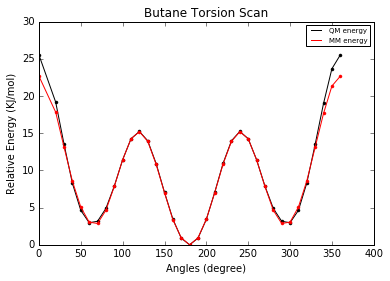

In [85]:
plt.plot(scan_MP2_ch.steps, scan_MP2_ch.qm_energy, color='black', label='QM energy')
plt.plot(scan_MP2_ch.steps, scan_MP2_ch.qm_energy, '.', color='black')
plt.plot(scan_MP2_ch.steps, scan_MP2_ch.mm_energy, color='red', label='MM energy')
plt.plot(scan_MP2_ch.steps, scan_MP2_ch.mm_energy,'.', color='red')

plt.legend(prop={'size':7})
plt.title('Butane Torsion Scan')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Butane_total_energy.pdf')

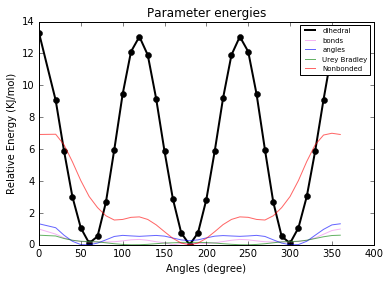

In [81]:
plt.plot(scan_dih.steps, scan_dih.mm_energy, color='black',linewidth=2.0, label='dihedral')
plt.plot(scan_dih.steps, scan_dih.mm_energy, 'o', color='black')
plt.plot(scan_bonds.steps, scan_bonds.mm_energy, color='violet', alpha=0.6, label='bonds')
#plt.plot(scan_bonds.steps, scan_bonds.mm_energy, '.', color='red')
plt.plot(scan_angles.steps, scan_angles.mm_energy, color='blue', alpha=0.6, label='angles')
#plt.plot(scan_angles.steps, scan_angles.mm_energy, '.', color='orange')
plt.plot(scan_ub.steps, scan_ub.mm_energy, color='green',alpha=0.6, label='Urey Bradley')
#plt.plot(scan_ub.steps, scan_ub.mm_energy, '.', color='green')

plt.plot(scan_nb.steps, scan_nb.mm_energy, color='red', alpha=0.6, label='Nonbonded')
#plt.plot(scan_nb.steps, scan_nb.mm_energy, '.', color='violet')
#plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, color='yellow', label='dihedral')
#plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, '.', color='yellow')
#plt.plot(scan_dih_h.steps, scan_dih_h.mm_energy, color='purple', label='dihedral')
#plt.plot(scan_dih_h.steps, scan_dih_h.mm_energy, '.', color='purple')
#plt.plot(scan_MP2.steps, scan_MP2.mm_energy, '.', color='gold')
#plt.plot(scan_MP2.steps, scan_MP2.mm_energy, color='gold', label='MM energy')
#plt.plot(scan_MP2.steps, scan_MP2.qm_energy, '.', color='navy')
#plt.plot(scan_MP2.steps, scan_MP2.qm_energy, color='navy', label='QM energy')


plt.legend(prop={'size':7})
plt.title('Parameter energies')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Butane_scan_param_energies_1.pdf')

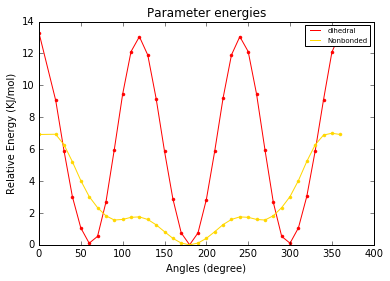

In [64]:
plt.plot(scan_dih.steps, scan_dih.mm_energy, color='red', label='dihedral')
plt.plot(scan_dih.steps, scan_dih.mm_energy, '.', color='red')
plt.plot(scan_nb.steps, scan_nb.mm_energy, color='gold', label='Nonbonded')
plt.plot(scan_nb.steps, scan_nb.mm_energy, '.', color='gold')
#plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, color='green', label='C-C-C-C')
#plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, '.', color='green')
plt.legend(prop={'size':7})
plt.title('Parameter energies')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')

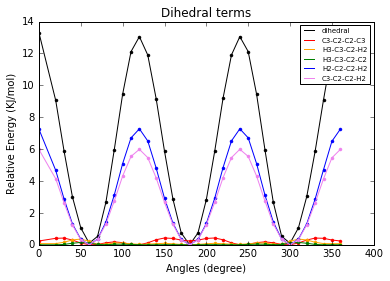

In [68]:
plt.plot(scan_dih.steps, scan_dih.mm_energy, color='black', label='dihedral')
plt.plot(scan_dih.steps, scan_dih.mm_energy, '.', color='black')
plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, color='red', label='C3-C2-C2-C3')
plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, '.', color='red')
plt.plot(scan_dih_h1.steps, scan_dih_h1.mm_energy, color='orange', label='H3-C3-C2-H2')
plt.plot(scan_dih_h1.steps, scan_dih_h1.mm_energy, '.',  color='orange')
plt.plot(scan_dih_h2.steps, scan_dih_h2.mm_energy, color='green', label='H3-C3-C2-C2')
plt.plot(scan_dih_h2.steps, scan_dih_h2.mm_energy, '.', color='green')
plt.plot(scan_dih_h3.steps, scan_dih_h3.mm_energy, color='blue', label='H2-C2-C2-H2')
plt.plot(scan_dih_h3.steps, scan_dih_h3.mm_energy, '.', color='blue')
plt.plot(scan_dih_h4.steps, scan_dih_h4.mm_energy, color='violet', label='C3-C2-C2-H2')
plt.plot(scan_dih_h4.steps, scan_dih_h4.mm_energy, '.', color='violet')
plt.legend(prop={'size':7})
plt.title('Dihedral terms')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Dihedral_contribution.pdf')

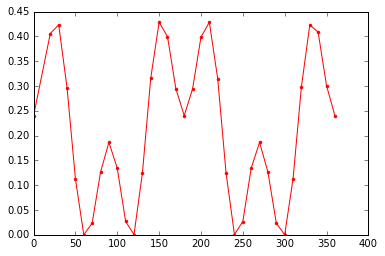

In [63]:
plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, color='red', label='C3-C2-C2-C3')
plt.plot(scan_dih_c.steps, scan_dih_c.mm_energy, '.', color='red')